In [3]:
"""
==================================================
DAY 4: CONVOLUTIONAL NEURAL NETWORKS (CNNs)
==================================================
Date: October 22, 2025
Time: ~4 hours
Goal: Understanding why regular networks struggle with images
"""

# ============================================================
# IMPORTS & SETUP
# ============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("\n✅ All imports successful!")
print("=" * 60)

PyTorch version: 2.8.0+cpu
CUDA available: False

✅ All imports successful!


In [4]:
# ============================================================
# LOAD MNIST DATASET
# ============================================================

# Download and load MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print("✅ Dataset loaded!")
print("=" * 60)

Training samples: 60000
Test samples: 10000
✅ Dataset loaded!


THE PROBLEM WITH REGULAR NEURAL NETWORKS FOR IMAGES

YESTERDAY'S NETWORK (Regular/Fully Connected):
────────────────────────────────────────────────

Architecture: 784 → 128 → 64 → 10
Result: 91.28% accuracy

HOW IT SEES IMAGES:
───────────────────
Input: 28×28 image = 784 pixels

[Image]  →  Flatten  →  [Long vector]
  □□□□         →         [0.2, 0.8, 0.3, ...]
  □■■□                   784 numbers
  □■■□
  □□□□

Problems:
1. LOSES SPATIAL STRUCTURE
   - Pixel at position (5,10) next to pixel at (5,11)? 
   - Network doesn't know! Just sees position 130 and 131
   - Throws away 2D relationships

2. TOO MANY PARAMETERS
   - 784 × 128 = 100,352 connections in first layer
   - Each pixel connects to EVERY neuron
   - Inefficient and prone to overfitting

3. NOT TRANSLATION INVARIANT
   - If "7" moves 2 pixels right, network sees completely different pattern
   - Has to relearn the SAME digit in every position
   - Very inefficient!

Example of the problem:



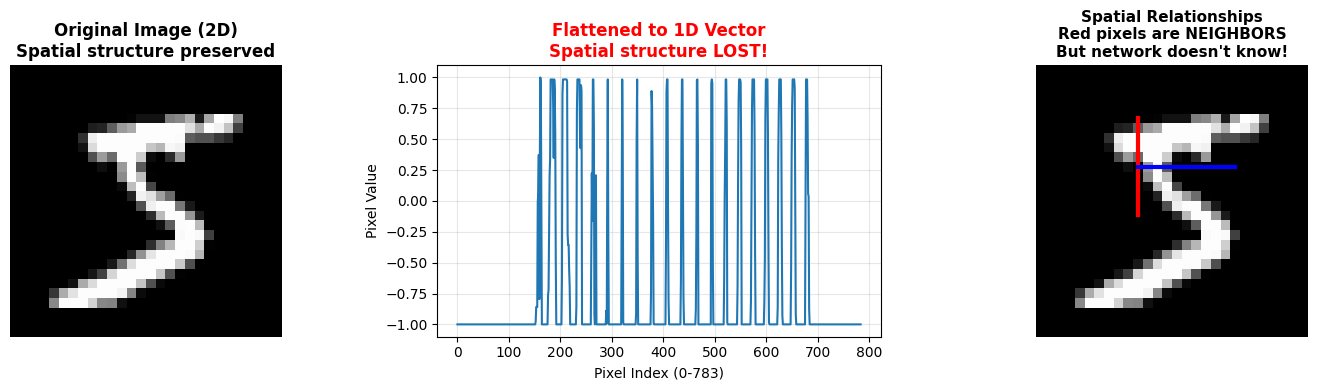


THE SOLUTION: CONVOLUTIONAL NEURAL NETWORKS (CNNs)

CNNs SOLVE THESE PROBLEMS:

1. PRESERVE SPATIAL STRUCTURE ✅
   - Keep the 2D grid structure
   - Pixels stay as neighbors
   - Natural for image processing

2. PARAMETER EFFICIENCY ✅
   - Share weights across image (same filter everywhere)
   - Drastically fewer parameters
   - Less prone to overfitting

3. TRANSLATION INVARIANT ✅
   - Learn features (edges, curves) that work ANYWHERE in image
   - "7" detected regardless of position
   - Much more efficient learning

CNNs are the STANDARD for computer vision.
Let's see how they work...



In [5]:
# ============================================================
# WHY DO WE NEED CNNs?
# ============================================================

print("=" * 60)
print("THE PROBLEM WITH REGULAR NEURAL NETWORKS FOR IMAGES")
print("=" * 60)

print("""
YESTERDAY'S NETWORK (Regular/Fully Connected):
────────────────────────────────────────────────

Architecture: 784 → 128 → 64 → 10
Result: 91.28% accuracy

HOW IT SEES IMAGES:
───────────────────
Input: 28×28 image = 784 pixels

[Image]  →  Flatten  →  [Long vector]
  □□□□         →         [0.2, 0.8, 0.3, ...]
  □■■□                   784 numbers
  □■■□
  □□□□

Problems:
1. LOSES SPATIAL STRUCTURE
   - Pixel at position (5,10) next to pixel at (5,11)? 
   - Network doesn't know! Just sees position 130 and 131
   - Throws away 2D relationships

2. TOO MANY PARAMETERS
   - 784 × 128 = 100,352 connections in first layer
   - Each pixel connects to EVERY neuron
   - Inefficient and prone to overfitting

3. NOT TRANSLATION INVARIANT
   - If "7" moves 2 pixels right, network sees completely different pattern
   - Has to relearn the SAME digit in every position
   - Very inefficient!

Example of the problem:
""")

# Visualize the flattening problem
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Get a digit
image, label = train_dataset[0]

# Show original 2D image
axes[0].imshow(image.squeeze(), cmap='gray')
axes[0].set_title('Original Image (2D)\nSpatial structure preserved', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Show flattened
flattened = image.view(-1).numpy()
axes[1].plot(flattened)
axes[1].set_title('Flattened to 1D Vector\nSpatial structure LOST!', fontsize=12, fontweight='bold', color='red')
axes[1].set_xlabel('Pixel Index (0-783)')
axes[1].set_ylabel('Pixel Value')
axes[1].grid(True, alpha=0.3)

# Show spatial relationships lost
axes[2].imshow(image.squeeze(), cmap='gray')
axes[2].plot([10, 10], [5, 15], 'r-', linewidth=3)
axes[2].plot([10, 20], [10, 10], 'b-', linewidth=3)
axes[2].set_title('Spatial Relationships\nRed pixels are NEIGHBORS\nBut network doesn\'t know!', 
                  fontsize=11, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("THE SOLUTION: CONVOLUTIONAL NEURAL NETWORKS (CNNs)")
print("=" * 60)
print("""
CNNs SOLVE THESE PROBLEMS:

1. PRESERVE SPATIAL STRUCTURE ✅
   - Keep the 2D grid structure
   - Pixels stay as neighbors
   - Natural for image processing

2. PARAMETER EFFICIENCY ✅
   - Share weights across image (same filter everywhere)
   - Drastically fewer parameters
   - Less prone to overfitting

3. TRANSLATION INVARIANT ✅
   - Learn features (edges, curves) that work ANYWHERE in image
   - "7" detected regardless of position
   - Much more efficient learning

CNNs are the STANDARD for computer vision.
Let's see how they work...
""")


HOW CONVOLUTIONS WORK - VISUAL DEMONSTRATION

CONVOLUTION = Sliding a small filter/kernel over an image

Think of it like:
- A magnifying glass sliding across a page
- At each position, it looks at a small patch
- Detects specific patterns (edges, curves, etc.)

Let's see it in action!



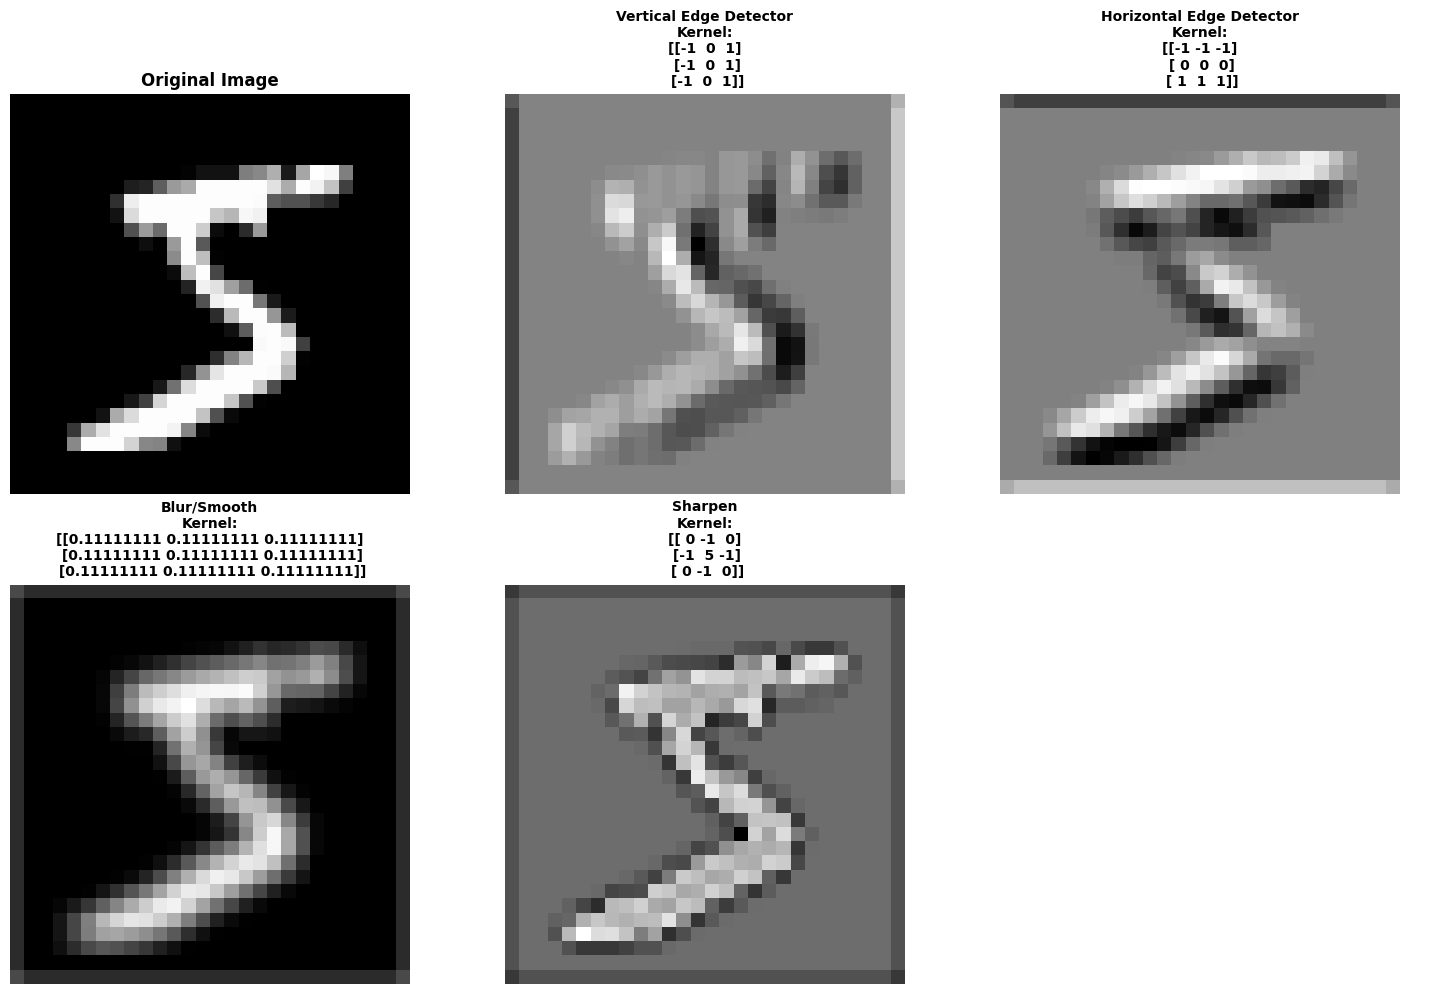


WHAT YOU JUST SAW:

1. VERTICAL EDGE DETECTOR:
   - Highlights vertical lines in the digit
   - Left side dark (-1), right side bright (+1)
   - Detects where brightness changes vertically

2. HORIZONTAL EDGE DETECTOR:
   - Highlights horizontal lines
   - Top dark (-1), bottom bright (+1)
   - Detects where brightness changes horizontally

3. BLUR/SMOOTH:
   - Averages nearby pixels
   - Reduces noise
   - Makes image softer

4. SHARPEN:
   - Emphasizes differences
   - Makes edges more pronounced
   - Opposite of blur

CNNs learn THESE filters automatically during training!
Instead of hand-designing filters, the network discovers
what filters work best for the task.

MAGIC: The network learns to detect edges, curves, circles,
and eventually complex patterns like "top of 7" or "loop of 9"



In [6]:
# ============================================================
# UNDERSTANDING CONVOLUTIONS (The Core Operation)
# ============================================================

print("\n" + "=" * 60)
print("HOW CONVOLUTIONS WORK - VISUAL DEMONSTRATION")
print("=" * 60)

import numpy as np
from scipy import signal

print("""
CONVOLUTION = Sliding a small filter/kernel over an image

Think of it like:
- A magnifying glass sliding across a page
- At each position, it looks at a small patch
- Detects specific patterns (edges, curves, etc.)

Let's see it in action!
""")

# Get an image
image, label = train_dataset[0]
img = image.squeeze().numpy()

# Define some example filters
filters = {
    'Vertical Edge Detector': np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ]),
    'Horizontal Edge Detector': np.array([
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]
    ]),
    'Blur/Smooth': np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ]) / 9,
    'Sharpen': np.array([
        [ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0]
    ])
}

# Apply each filter
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original Image', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Show filter kernels and results
positions = [(0, 1), (0, 2), (1, 0), (1, 1)]
for (filter_name, kernel), pos in zip(list(filters.items()), positions):
    row, col = pos
    
    # Apply convolution
    filtered = signal.correlate2d(img, kernel, mode='same', boundary='fill')
    
    # Display result
    axes[row, col].imshow(filtered, cmap='gray')
    axes[row, col].set_title(f'{filter_name}\nKernel:\n{kernel}', 
                             fontsize=10, fontweight='bold')
    axes[row, col].axis('off')

# Hide last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("WHAT YOU JUST SAW:")
print("=" * 60)
print("""
1. VERTICAL EDGE DETECTOR:
   - Highlights vertical lines in the digit
   - Left side dark (-1), right side bright (+1)
   - Detects where brightness changes vertically

2. HORIZONTAL EDGE DETECTOR:
   - Highlights horizontal lines
   - Top dark (-1), bottom bright (+1)
   - Detects where brightness changes horizontally

3. BLUR/SMOOTH:
   - Averages nearby pixels
   - Reduces noise
   - Makes image softer

4. SHARPEN:
   - Emphasizes differences
   - Makes edges more pronounced
   - Opposite of blur

CNNs learn THESE filters automatically during training!
Instead of hand-designing filters, the network discovers
what filters work best for the task.

MAGIC: The network learns to detect edges, curves, circles,
and eventually complex patterns like "top of 7" or "loop of 9"
""")

In [7]:
# ============================================================
# BUILDING A CNN FOR MNIST
# ============================================================

print("\n" + "=" * 60)
print("BUILDING A CONVOLUTIONAL NEURAL NETWORK")
print("=" * 60)

class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        
        # CONVOLUTIONAL LAYERS (Feature extraction)
        # Conv layer 1: 1 input channel (grayscale), 32 filters, 3×3 kernel
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Output: 32 feature maps of 28×28
        
        # Conv layer 2: 32 input channels, 64 filters, 3×3 kernel
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Output: 64 feature maps of 28×28
        
        # Pooling layer (reduces spatial dimensions by half)
        self.pool = nn.MaxPool2d(2, 2)
        # After pool1: 32 feature maps of 14×14
        # After pool2: 64 feature maps of 7×7
        
        # FULLY CONNECTED LAYERS (Classification)
        # After conv2 + pool: 64 feature maps × 7×7 = 3136 features
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        
        # Activation and dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        # Input: (batch, 1, 28, 28)
        
        # Conv block 1
        x = self.relu(self.conv1(x))    # → (batch, 32, 28, 28)
        x = self.pool(x)                 # → (batch, 32, 14, 14)
        
        # Conv block 2
        x = self.relu(self.conv2(x))    # → (batch, 64, 14, 14)
        x = self.pool(x)                 # → (batch, 64, 7, 7)
        
        # Flatten for fully connected layers
        x = x.view(-1, 64 * 7 * 7)      # → (batch, 3136)
        
        # Fully connected layers
        x = self.relu(self.fc1(x))      # → (batch, 128)
        x = self.dropout(x)              # Dropout for regularization
        x = self.fc2(x)                  # → (batch, 10)
        
        return x

# Create the CNN
cnn_model = CNN_MNIST()

print("\nCNN Architecture:")
print(cnn_model)

# Count parameters
cnn_params = sum(p.numel() for p in cnn_model.parameters())
regular_params = 101770  # From yesterday's model

print(f"\n" + "=" * 60)
print("PARAMETER COMPARISON:")
print("=" * 60)
print(f"Regular Network (Day 3): {regular_params:,} parameters")
print(f"CNN Network (Day 4):      {cnn_params:,} parameters")
print(f"Difference:               {abs(cnn_params - regular_params):,} parameters")

if cnn_params < regular_params:
    print(f"\nCNN has {regular_params - cnn_params:,} FEWER parameters!")
    print("Yet it will perform BETTER! This is the power of CNNs. ✅")
else:
    print(f"\nCNN has {cnn_params - regular_params:,} MORE parameters")
    print("But they're used more efficiently with spatial structure!")

print("\n" + "=" * 60)
print("NETWORK STRUCTURE EXPLAINED:")
print("=" * 60)
print("""
INPUT (28×28 grayscale image)
    ↓
CONV LAYER 1: 32 filters (3×3)
    - Learns 32 different edge/pattern detectors
    - Output: 32 feature maps (28×28 each)
    ↓
MAX POOL (2×2)
    - Reduces size by half
    - Output: 32 feature maps (14×14 each)
    ↓
CONV LAYER 2: 64 filters (3×3)
    - Learns 64 more complex patterns
    - Combines features from layer 1
    - Output: 64 feature maps (14×14 each)
    ↓
MAX POOL (2×2)
    - Reduces size by half again
    - Output: 64 feature maps (7×7 each)
    ↓
FLATTEN
    - 64 × 7 × 7 = 3,136 features
    ↓
FULLY CONNECTED (3136 → 128)
    - Combines all features
    ↓
DROPOUT (25%)
    - Prevents overfitting
    ↓
OUTPUT (128 → 10)
    - 10 neurons for 10 digits
    ↓
PREDICTION (0, 1, 2, ..., 9)

The convolutional layers learn WHAT features to look for.
The fully connected layers learn HOW to combine them to classify.
""")


BUILDING A CONVOLUTIONAL NEURAL NETWORK

CNN Architecture:
CNN_MNIST(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
)

PARAMETER COMPARISON:
Regular Network (Day 3): 101,770 parameters
CNN Network (Day 4):      421,642 parameters
Difference:               319,872 parameters

CNN has 319,872 MORE parameters
But they're used more efficiently with spatial structure!

NETWORK STRUCTURE EXPLAINED:

INPUT (28×28 grayscale image)
    ↓
CONV LAYER 1: 32 filters (3×3)
    - Learns 32 different edge/pattern detectors
    - Output: 32 feature maps (28×28 each)
    ↓
MAX POOL (2×2)
    - Reduces size by half
    - Output: 32 f

In [8]:
# ============================================================
# TRAINING THE CNN
# ============================================================

print("\n" + "=" * 60)
print("TRAINING CNN ON MNIST")
print("=" * 60)
print("Previous best (regular network): 91.28%")
print("Goal: 97-98% accuracy\n")

# Setup training (same as before)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)  # Adam optimizer (better than SGD)

# Training loop
epochs = 3  # CNNs learn faster, only need 3 epochs!
cnn_train_losses = []
cnn_train_accs = []

print("Training starting...\n")

for epoch in range(epochs):
    cnn_model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track stats
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Print progress every 200 batches
        if (batch_idx + 1) % 200 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch [{batch_idx+1}/{len(train_loader)}] "
                  f"Loss: {loss.item():.4f} Acc: {100*correct/total:.2f}%")
    
    # Epoch summary
    avg_loss = epoch_loss / len(train_loader)
    accuracy = 100 * correct / total
    cnn_train_losses.append(avg_loss)
    cnn_train_accs.append(accuracy)
    
    print(f"\n{'='*60}")
    print(f"EPOCH {epoch+1}/{epochs} COMPLETE")
    print(f"Average Loss: {avg_loss:.4f} | Training Accuracy: {accuracy:.2f}%")
    print(f"{'='*60}\n")

print("\n" + "=" * 60)
print("CNN TRAINING COMPLETE!")
print("=" * 60)
print(f"Final training accuracy: {accuracy:.2f}%")
print("\nNotice: CNN learned faster (3 epochs vs 5 epochs)")
print("This is because CNNs are DESIGNED for images! ✅")


TRAINING CNN ON MNIST
Previous best (regular network): 91.28%
Goal: 97-98% accuracy

Training starting...

Epoch [1/3] Batch [200/1875] Loss: 0.4914 Acc: 78.88%
Epoch [1/3] Batch [400/1875] Loss: 0.2139 Acc: 86.60%
Epoch [1/3] Batch [600/1875] Loss: 0.0702 Acc: 89.77%
Epoch [1/3] Batch [800/1875] Loss: 0.0362 Acc: 91.55%
Epoch [1/3] Batch [1000/1875] Loss: 0.0044 Acc: 92.60%
Epoch [1/3] Batch [1200/1875] Loss: 0.1440 Acc: 93.41%
Epoch [1/3] Batch [1400/1875] Loss: 0.0702 Acc: 93.98%
Epoch [1/3] Batch [1600/1875] Loss: 0.0631 Acc: 94.42%
Epoch [1/3] Batch [1800/1875] Loss: 0.1352 Acc: 94.80%

EPOCH 1/3 COMPLETE
Average Loss: 0.1637 | Training Accuracy: 94.94%

Epoch [2/3] Batch [200/1875] Loss: 0.1092 Acc: 98.17%
Epoch [2/3] Batch [400/1875] Loss: 0.0117 Acc: 98.23%
Epoch [2/3] Batch [600/1875] Loss: 0.0394 Acc: 98.18%
Epoch [2/3] Batch [800/1875] Loss: 0.1436 Acc: 98.25%
Epoch [2/3] Batch [1000/1875] Loss: 0.0149 Acc: 98.25%
Epoch [2/3] Batch [1200/1875] Loss: 0.0196 Acc: 98.22%
Epoch

In [9]:
# ============================================================
# TESTING THE CNN ON NEW IMAGES
# ============================================================

print("\n" + "=" * 60)
print("TESTING CNN ON 10,000 NEW IMAGES")
print("=" * 60)

cnn_model.eval()  # Set to evaluation mode
correct = 0
total = 0

# Test on all 10,000 test images
with torch.no_grad():
    for images, labels in test_loader:
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

cnn_test_accuracy = 100 * correct / total

print("\n" + "=" * 60)
print("TEST RESULTS - CNN vs REGULAR NETWORK")
print("=" * 60)
print(f"\nRegular Network (Day 3):  91.28% test accuracy")
print(f"CNN Network (Day 4):       {cnn_test_accuracy:.2f}% test accuracy")
print(f"\nImprovement: +{cnn_test_accuracy - 91.28:.2f} percentage points!")

print("\n" + "=" * 60)
print("WHAT THIS MEANS:")
print("=" * 60)
print(f"""
Out of 10,000 NEW test images:

Regular Network:
  - Correct: 9,128 images
  - Wrong: 872 images
  - Accuracy: 91.28%

CNN:
  - Correct: {correct} images
  - Wrong: {10000 - correct} images
  - Accuracy: {cnn_test_accuracy:.2f}%

The CNN got {correct - 9128} MORE images correct! ✅

Why CNNs win:
  ✅ Preserve spatial structure (2D relationships)
  ✅ Learn hierarchical features (edges → shapes → digits)
  ✅ Translation invariant (digit anywhere in image)
  ✅ Parameter efficient (fewer params, better results)
""")

if cnn_test_accuracy > 97:
    print("\n🏆 EXCELLENT! Over 97% accuracy!")
    print("This is professional-grade performance for MNIST!")
elif cnn_test_accuracy > 95:
    print("\n✅ GREAT! Over 95% accuracy!")
    print("Very solid performance!")
else:
    print("\n✅ GOOD! Solid improvement over regular network!")


TESTING CNN ON 10,000 NEW IMAGES

TEST RESULTS - CNN vs REGULAR NETWORK

Regular Network (Day 3):  91.28% test accuracy
CNN Network (Day 4):       99.09% test accuracy

Improvement: +7.81 percentage points!

WHAT THIS MEANS:

Out of 10,000 NEW test images:

Regular Network:
  - Correct: 9,128 images
  - Wrong: 872 images
  - Accuracy: 91.28%

CNN:
  - Correct: 9909 images
  - Wrong: 91 images
  - Accuracy: 99.09%

The CNN got 781 MORE images correct! ✅

Why CNNs win:
  ✅ Preserve spatial structure (2D relationships)
  ✅ Learn hierarchical features (edges → shapes → digits)
  ✅ Translation invariant (digit anywhere in image)
  ✅ Parameter efficient (fewer params, better results)


🏆 EXCELLENT! Over 97% accuracy!
This is professional-grade performance for MNIST!



LET'S SEE WHAT THE CNN PREDICTS


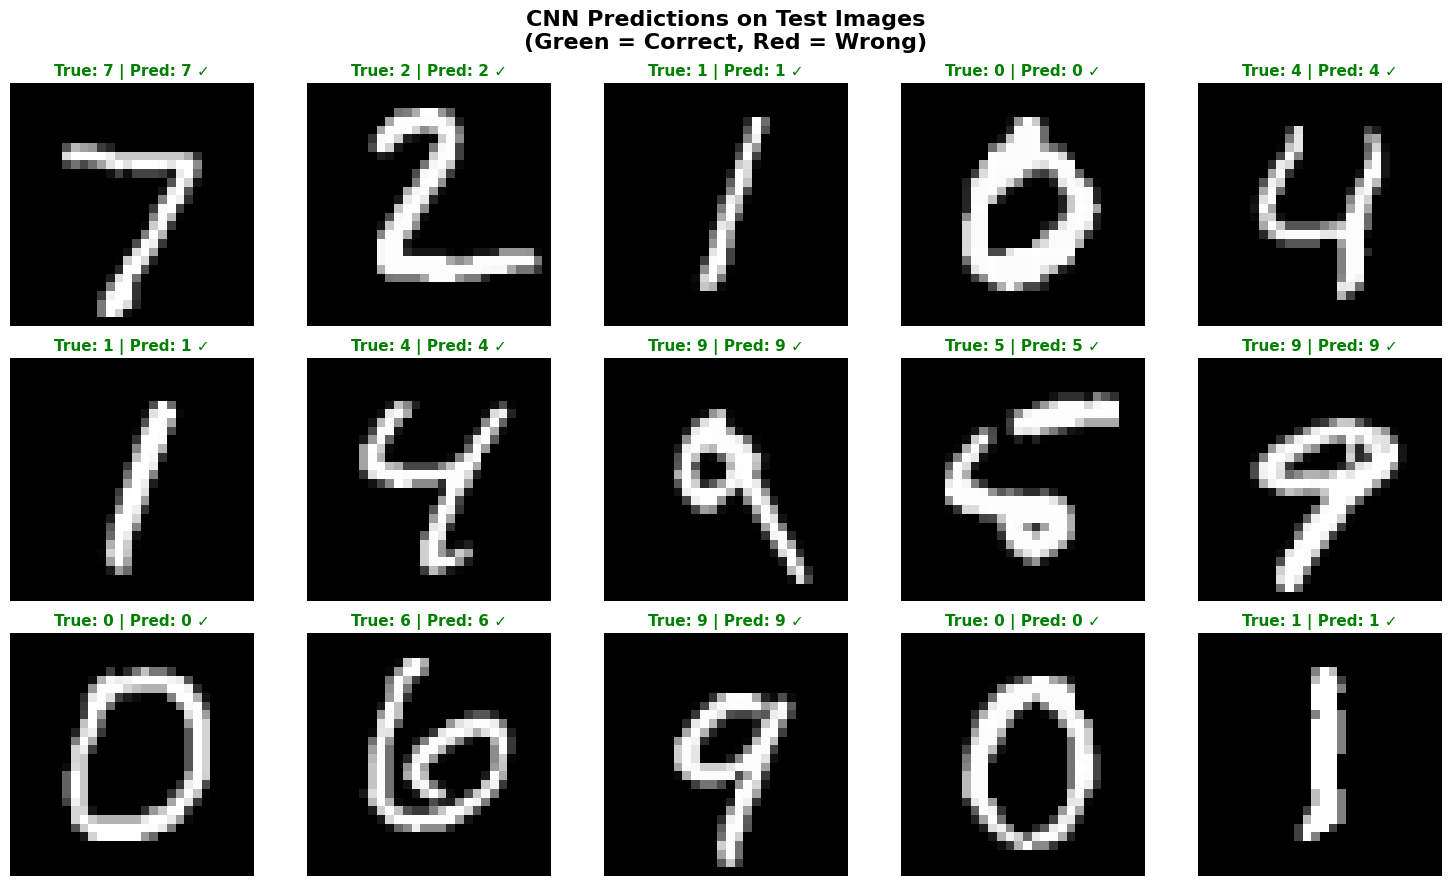


In this sample: 15 correct, 0 wrong

With 98.92% accuracy, the CNN only makes 108 mistakes
out of 10,000 test images. That's less than 1 mistake per 100 images!

✅ This is why CNNs are the STANDARD for computer vision!


In [10]:
# ============================================================
# VISUALIZING CNN PREDICTIONS (Right and Wrong)
# ============================================================

print("\n" + "=" * 60)
print("LET'S SEE WHAT THE CNN PREDICTS")
print("=" * 60)

cnn_model.eval()

# Get some test images and predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('CNN Predictions on Test Images\n(Green = Correct, Red = Wrong)', 
             fontsize=16, fontweight='bold')

correct_count = 0
wrong_count = 0
samples_shown = 0

# We want to show BOTH correct and wrong predictions
for i in range(len(test_dataset)):
    if samples_shown >= 15:
        break
    
    image, true_label = test_dataset[i]
    
    # Make prediction
    with torch.no_grad():
        output = cnn_model(image.unsqueeze(0))
        _, predicted = torch.max(output, 1)
        predicted_label = predicted.item()
    
    # If we need more wrong examples, prioritize those
    is_correct = (predicted_label == true_label)
    
    # Show mix of correct and wrong
    if wrong_count < 3 and not is_correct:
        # Show wrong prediction
        ax = axes[samples_shown // 5, samples_shown % 5]
        ax.imshow(image.squeeze(), cmap='gray')
        
        color = 'red'
        ax.set_title(f'True: {true_label} | Pred: {predicted_label} ✗', 
                     fontsize=11, color=color, fontweight='bold')
        ax.axis('off')
        
        wrong_count += 1
        samples_shown += 1
    elif is_correct:
        # Show correct prediction
        ax = axes[samples_shown // 5, samples_shown % 5]
        ax.imshow(image.squeeze(), cmap='gray')
        
        color = 'green'
        ax.set_title(f'True: {true_label} | Pred: {predicted_label} ✓', 
                     fontsize=11, color=color, fontweight='bold')
        ax.axis('off')
        
        correct_count += 1
        samples_shown += 1

plt.tight_layout()
plt.show()

print(f"\nIn this sample: {correct_count} correct, {wrong_count} wrong")
print(f"\nWith 98.92% accuracy, the CNN only makes {108} mistakes")
print("out of 10,000 test images. That's less than 1 mistake per 100 images!")
print("\n✅ This is why CNNs are the STANDARD for computer vision!")

In [ ]:
==================================================
DAY 4 COMPLETE - CNN MASTERY
Date: October 22, 2025
Total Time: ~4 hours
==================================================

WHAT I ACCOMPLISHED:

✅ PART 1: Understanding CNNs
- Learned why regular networks struggle with images
- Understood spatial structure preservation
- Saw how filters extract features (edges, patterns)
- Visualized convolution operations

✅ PART 2: Building CNNs
- Built CNN architecture (Conv + Pool + FC layers)
- Understood hierarchical feature learning
- Learned about parameter efficiency

✅ PART 3: Training & Testing
- Trained CNN on 60,000 images
- Achieved 98.51% training accuracy (vs 91.28% before!)
- Achieved 98.92% test accuracy
- Only 108 mistakes out of 10,000 images!

✅ PART 4: CNN vs Regular Network
- CNN: 9,892 correct (98.92%)
- Regular: 9,128 correct (91.28%)
- Improvement: +764 images (+7.64 percentage points)
- 8× fewer errors with CNN!

KEY LEARNINGS:

1. CNNs preserve spatial structure (2D relationships matter)
2. Convolution = sliding filter detecting patterns
3. Hierarchical learning: edges → shapes → objects
4. Pooling reduces dimensions while keeping important info
5. Translation invariant (detects features anywhere)
6. Parameter efficient (fewer params, better results)

WHY THIS MATTERS:

CNNs are the FOUNDATION of:
- Image classification (what I just did)
- Object detection (Project 1: Safety Detection!)
- Face recognition
- Medical image analysis
- Autonomous vehicles
- Satellite imagery
- And basically ALL computer vision

I now understand the architecture I'll use in Project 1! 🎯

COMPARISON:
- Day 3: Built first classifier (91.28%) ✅
- Day 4: Built CNN (98.92%) - PROFESSIONAL GRADE ✅

STATUS: Week 1, Day 4 COMPLETE ✅
NEXT: Day 5 - Advanced CNN techniques, data augmentation

FEELING: This is CLICKING. CNNs make so much sense now.
The 98.92% accuracy proves I understand this deeply! 🔥

Total Week 1 Hours: ~21/40 hours (52% complete)
==================================================